<a href="https://colab.research.google.com/github/jamilemaia92/portfolio/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_dados_de_filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados **MovieLens**

# **`Dados MovieLens`**

In [1]:
import pandas as pd


In [2]:
notas = pd.read_csv("ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Conhecendo os dados


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns = "usuarioID","FilmeID", "Nota", "Data e Hora"
notas.head()

,usuarioID,FilmeID,Nota,Data e Hora
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Contagem das notas

In [5]:
notas["Nota"].value_counts()

Nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

Média das notas

In [6]:
notas["Nota"].mean()

3.501556983616962

<Axes: ylabel='Frequency'>

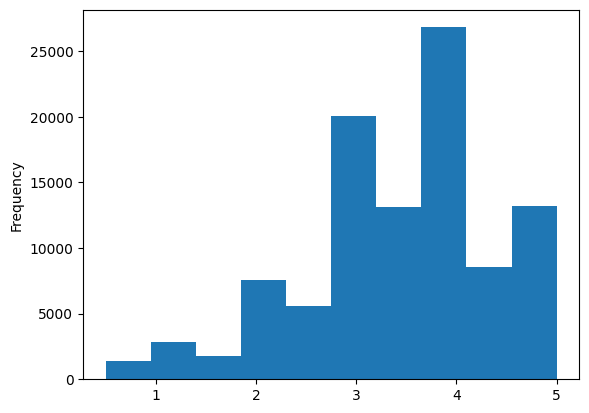

In [7]:
notas["Nota"].plot(kind ='hist')

Mediana das notas

In [8]:
notas["Nota"].median()

3.5

In [9]:
notas["Nota"].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Nota, dtype: float64

In [10]:
import seaborn as sns

<Axes: ylabel='Nota'>

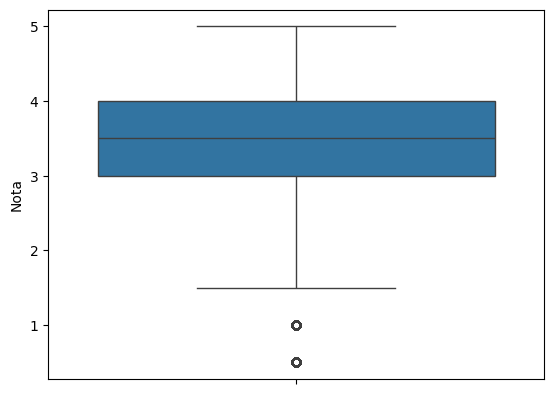

In [11]:
sns.boxplot(notas["Nota"])

In [12]:
filmes = pd.read_csv("movies.csv")

In [13]:
filmes.columns = ["filmeID", "titulo", "generos"]
filmes.head()

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
notas.head()

,usuarioID,FilmeID,Nota,Data e Hora
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Média Toy Story

In [15]:
notas.query("FilmeID == 1")["Nota"].mean()


3.9209302325581397

Média Jumanji

In [16]:
notas.query("FilmeID == 2")["Nota"].mean()

3.4318181818181817

In [17]:
media_por_filme = notas.groupby("FilmeID")["Nota"].mean()
media_por_filme.head()

FilmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: Nota, dtype: float64

<Axes: ylabel='Frequency'>

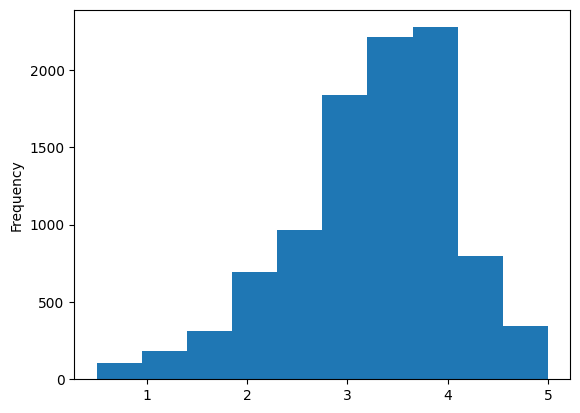

In [18]:
media_por_filme.plot(kind = "hist")

Percebe-se no histograma acima que a maior parte das notas ficam entre 3,5 até 4

<Axes: ylabel='Nota'>

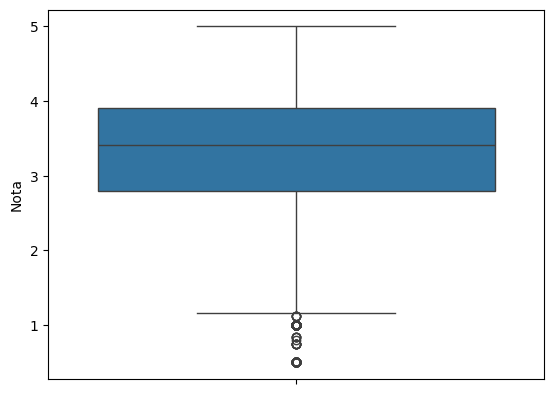

In [19]:
sns.boxplot(media_por_filme)

In [20]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: Nota, dtype: float64

Text(0.5, 1.0, 'Histograma das Médias dos Filmes')

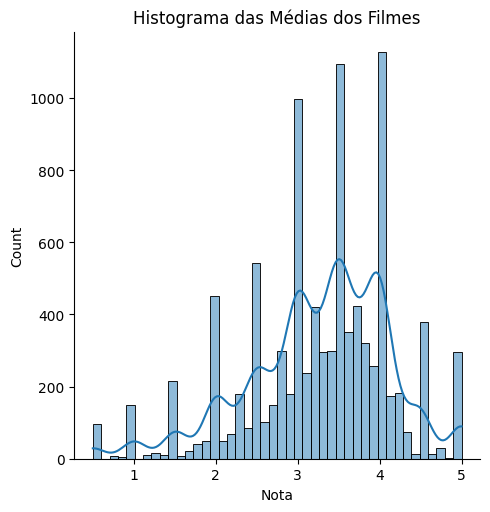

In [21]:
import matplotlib.pyplot as plt

sns.displot(media_por_filme, kde = True)
plt.title("Histograma das Médias dos Filmes")

Neste gráfico fica ainda mais claro que a incidêcia de notas acima de 4 são menores

Analisando boxplots

{'whiskers': [<matplotlib.lines.Line2D at 0x7ef090765ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ef090766410>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ef090765c30>,
 'medians': [<matplotlib.lines.Line2D at 0x7ef090766950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ef090766bf0>,
 'means': []}

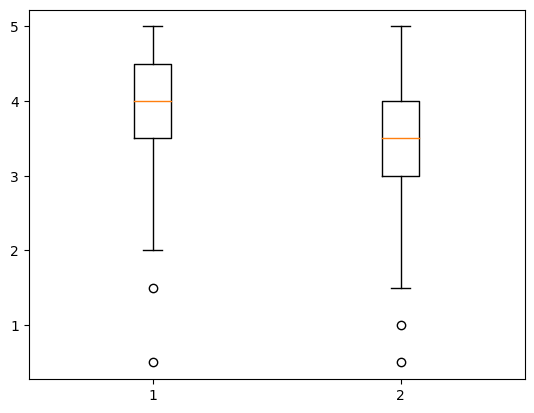

In [22]:
notas_toy_story = notas.query("FilmeID == 1")["Nota"]
notas_jumanji = notas.query("FilmeID == 2")["Nota"]

media_toy_story = notas_toy_story.mean()
media_jumanji = notas_jumanji.mean()

mediana_toy_story = notas_toy_story.median()
mediana_jumanji = notas_jumanji.median()

plt.boxplot([notas_toy_story, notas_jumanji])

<Axes: xlabel='FilmeID', ylabel='Nota'>

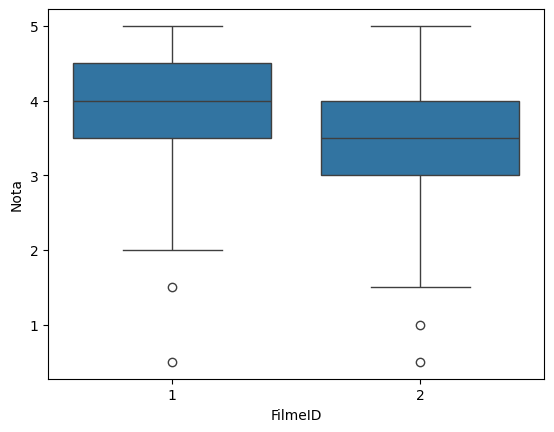

In [23]:
sns.boxplot(data=notas.query("FilmeID in [1,2]"),
            x = "FilmeID",
            y = "Nota"
)

Retirando os filmes que tem apenas uma nota

In [24]:
notas["FilmeID"].value_counts()
notas.groupby("FilmeID").count().query("Nota >1")

,usuarioID,Nota,Data e Hora
FilmeID,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
187541,4,4,4
187593,12,12,12
187595,5,5,5


# **Dados TMDB**

In [25]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")

In [26]:
 tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


<ipython-input-27-66b240766bac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmdb["revenue"])


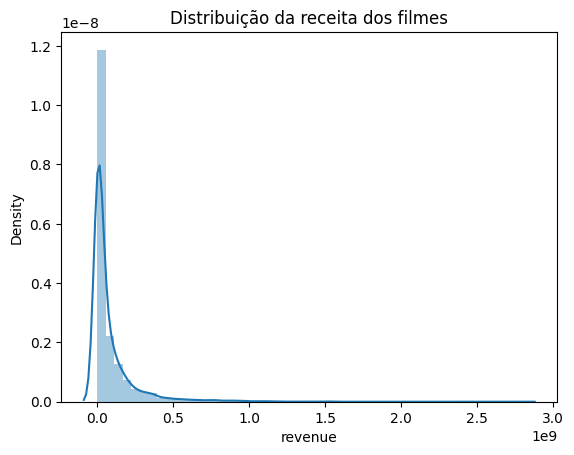

In [27]:
sns.distplot(tmdb["revenue"])
plt.title("Distribuição da receita dos filmes")
plt.show()

<ipython-input-28-edb8fca343ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmdb["budget"])


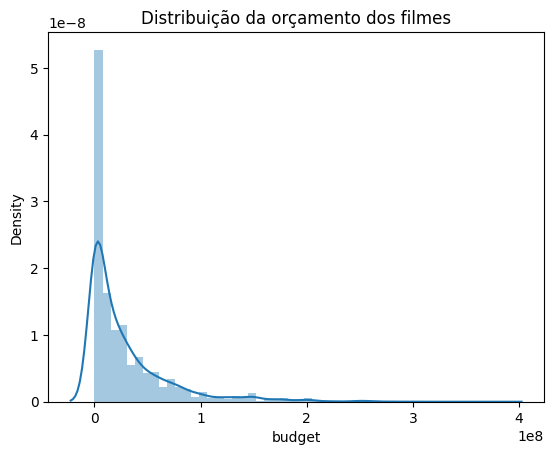

In [28]:
sns.distplot(tmdb["budget"])
plt.title("Distribuição da orçamento dos filmes")
plt.show()

In [29]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

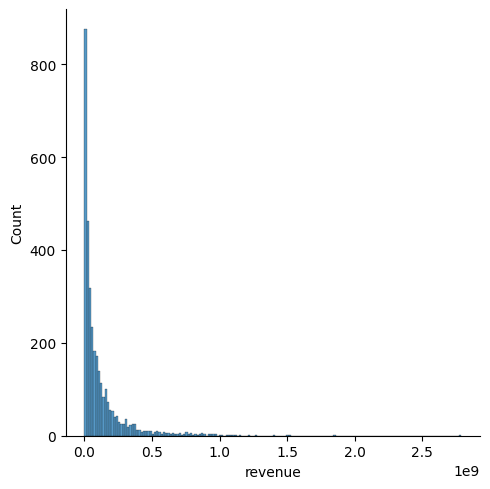

In [30]:
tmdb.query("revenue < 500")
com_faturamento = tmdb.query("revenue > 0")
sns.displot(com_faturamento["revenue"])

Ao analisar o orçamento, foi verificado que existiam faturamentos igual a 0 e foram retirados do resultado no gráfico acima.

In [31]:
tmdb["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [32]:
contagem = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem.columns = ["original_language","total"]
contagem.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: ylabel='total'>

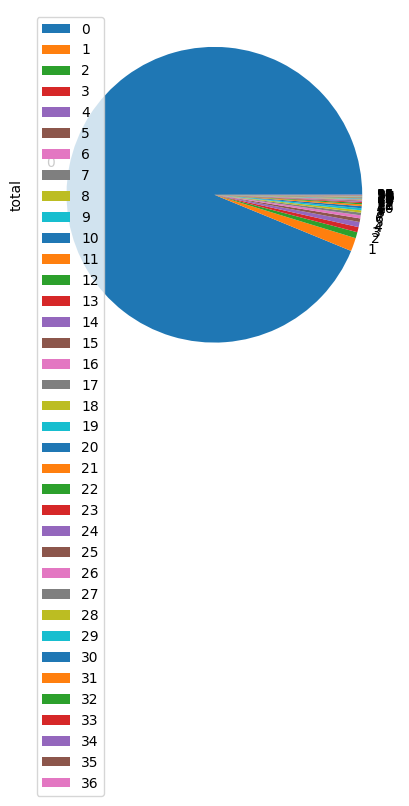

In [33]:
contagem.plot(kind="pie", y = "total")

Os gráficos acima não ficaram légiveis, portanto, iremos usar a solução abaixo para melhorar a visualização:

---



In [34]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_en = total_por_lingua.loc["en"]
total_outros = total_geral - total_en

In [35]:
dados = {
"lingua": ["inglês", "outros"],
"total": [total_en, total_outros]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,inglês,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

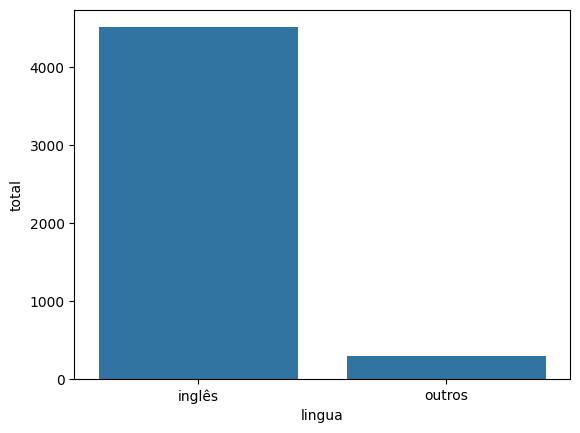

In [36]:
sns.barplot(data = dados, x = "lingua", y = "total")

<Axes: ylabel='total'>

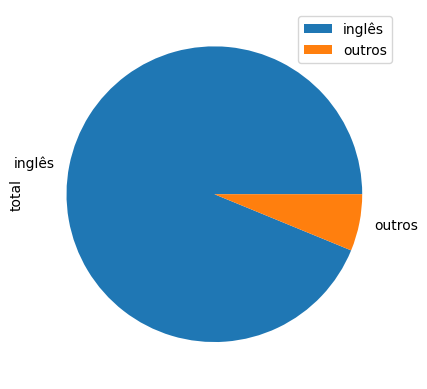

In [37]:
dados.plot(kind = "pie",y = "total", labels = dados["lingua"])

In [38]:
contagem_outros_por_lingua = tmdb.query("original_language !='en'")["original_language"].value_counts()
contagem_outros_por_lingua.head()

original_language
fr    70
es    32
zh    27
de    27
hi    19
Name: count, dtype: int64

<Axes: xlabel='original_language', ylabel='count'>

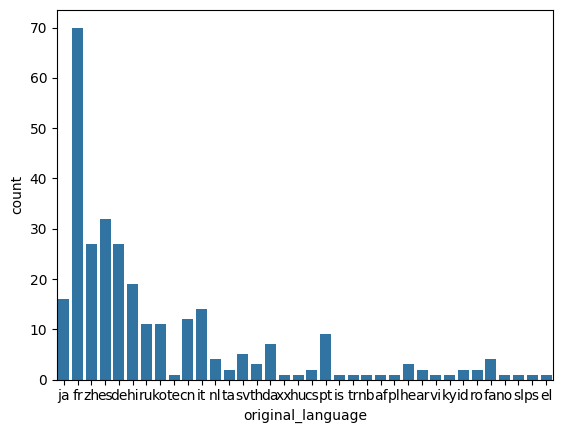

In [39]:
sns.countplot(data=tmdb.query("original_language !='en'"), x = "original_language" )

Vamos colocar o gráfico em ordem decrescente

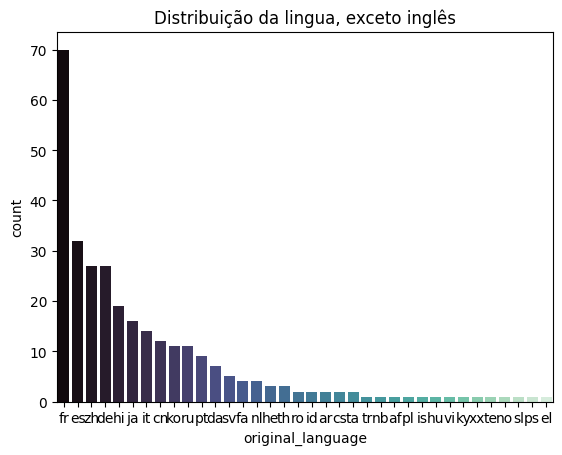

In [40]:
sns.countplot(data=tmdb.query("original_language !='en'"),
              order = contagem_outros_por_lingua.index,
              hue = "original_language",
              hue_order = contagem_outros_por_lingua.index,
              palette= "mako",
              x = "original_language" )
plt.title("Distribuição da lingua, exceto inglês")
plt.show()

Valores em percentual

In [41]:
tmdb.query("original_language !='en'")["original_language"].value_counts(normalize=True)

original_language
fr    0.234899
es    0.107383
zh    0.090604
de    0.090604
hi    0.063758
ja    0.053691
it    0.046980
cn    0.040268
ko    0.036913
ru    0.036913
pt    0.030201
da    0.023490
sv    0.016779
fa    0.013423
nl    0.013423
he    0.010067
th    0.010067
ro    0.006711
id    0.006711
ar    0.006711
cs    0.006711
ta    0.006711
tr    0.003356
nb    0.003356
af    0.003356
pl    0.003356
is    0.003356
hu    0.003356
vi    0.003356
ky    0.003356
xx    0.003356
te    0.003356
no    0.003356
sl    0.003356
ps    0.003356
el    0.003356
Name: proportion, dtype: float64

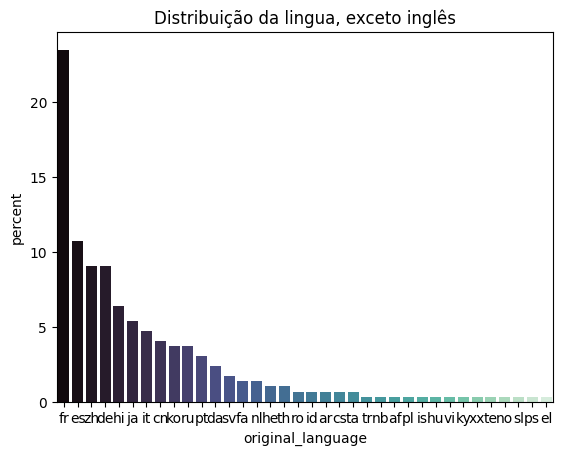

In [42]:
sns.countplot(data=tmdb.query("original_language !='en'"),
              order = contagem_outros_por_lingua.index,
              hue = "original_language",
              hue_order = contagem_outros_por_lingua.index,
              palette= "mako",
              stat="percent",
              x = "original_language" )
plt.title("Distribuição da lingua, exceto inglês")
plt.show()

Aumentando o tamanho do gráfico para ficar mais legível

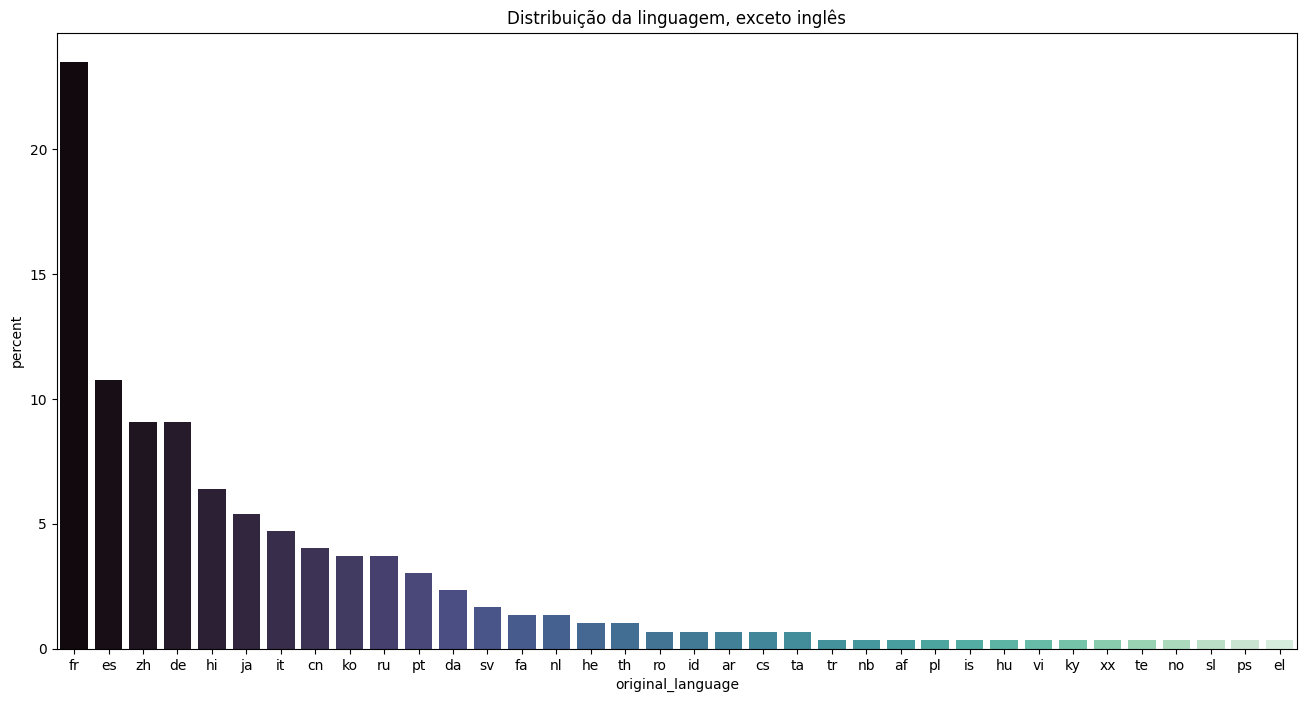

In [43]:
plt.figure(figsize=(16,8))
sns.countplot(data=tmdb.query("original_language !='en'"),
              order = contagem_outros_por_lingua.index,
              hue = "original_language",
              hue_order = contagem_outros_por_lingua.index,
              palette= "mako",
              stat="percent",
              x = "original_language" )
plt.title("Distribuição da linguagem, exceto inglês")
plt.show()